## Compare_results.ipynb
---
This notebook is for comparing results of graph.py 

If you want to compare two version of graph.py, 

you should first generate csv with graspi_igraph_notebook.ipynb (run all the cells)

helper functions are in /test/testing_helper.py

In [1]:
# single file comparison
targetFileName = "_small"    
#failed descriptors only
failonly = False

In [2]:
import importlib
import sys
import os
sys.path.append(os.path.abspath('..'))


In [3]:
########################################  readme  #####################################
# comparing the descriptors between new version and old version
# you can change targetFileName variable(line 25) to run the code with different file
# if the descriptors are the same, then you can see OK and value
#######################################################################################

import sys
import os

current_dir = os.getcwd()
src_path = os.path.abspath(os.path.join(current_dir, "../src"))
sys.path.append(src_path)

from py_graspi import descriptors as ds
from py_graspi import graph as ig

import graph_debugging as ig2
import os
import time
import matplotlib.pyplot as plt
import tracemalloc
# import src.descriptors as ds

importlib.reload(ds)  # 강제 리로드
importlib.reload(ig)  # 강제 리로드


current_dir = os.getcwd()
data_path = f"../../data/2phase/2D-morphologies/data/"
descriptors_path = f"../../data/2phase/2D-morphologies/descriptors/"
result_path = f"../performance_results/"
test_files = [os.path.splitext(file)[0] for file in os.listdir(data_path)]
epsilon = 1e-5

loop_cnt = 1

def run_test(lib, test_file):
    total_graph_time = 0
    tracemalloc.start()
    graph_start = time.time()
    g = lib.generateGraph(data_path + test_file + ".txt")
    _stats = tracemalloc.get_traced_memory()
    graph_end = time.time()
    tracemalloc.stop()

    graph_mem = _stats[1] - _stats[0]
    stats = ds.compute_descriptors(g, test_file,1.0)
    graph_time = graph_end - graph_start
    return stats, graph_time, graph_mem

# Run and compare for both ig and ig2
def test(singlefileonly):
    for test_file in test_files:
        if singlefileonly == True and targetFileName not in test_file:
                continue

        print(f"--- {test_file} ---")

        # Run for ig
        stats_ig, time_ig, mem_ig = run_test(ig, test_file)

        # Run for ig2
        stats_ig2, time_ig2, mem_ig2 = run_test(ig2, test_file)


        print("\n[Descriptor Comparison]")

        try:
            with open(descriptors_path + "descriptors." + test_file + ".log") as f:
                for line in f:
                    stat = line.strip().split(" ")
                    try:
                        if failonly == False and abs(stats_ig.get(stat[0], -1) - float(stat[1])) < epsilon:
                            print(f"new {stat[0]} passed")
                        elif stats_ig.get(stat[0], -1) != -1 and stats_ig.get(stat[0], -1) != int(stat[1]):
                            print(f"new {stat[0]} failed - {stats_ig.get(stat[0])} is not the same as expected {stat[1]}")

                        if failonly == False and abs(stats_ig2.get(stat[0], -1) - float(stat[1])) < epsilon:
                            print(f"prev {stat[0]} passed")
                        elif stats_ig2.get(stat[0], -1) != -1 and stats_ig2.get(stat[0], -1) != int(stat[1]):
                            print(f"prev {stat[0]} failed - {stats_ig2.get(stat[0])} is not the same as expected {stat[1]}")

                    except ValueError:
                        if failonly == False and abs(stats_ig.get(stat[0], -1) - float(stat[1])) < epsilon:
                            print(f"new {stat[0]} passed")
                        elif stats_ig.get(stat[0], -1) != -1 and stats_ig.get(stat[0]) != float(stat[1]):
                            print(f"new {stat[0]} failed - {stats_ig.get(stat[0])} is not the same as expected {stat[1]}")

                        if failonly == False and abs(stats_ig2.get(stat[0], -1) - float(stat[1])) < epsilon:
                            print(f"prev {stat[0]} passed")
                        elif stats_ig2.get(stat[0], -1) != -1 and stats_ig2.get(stat[0]) != float(stat[1]):
                            print(f"prev {stat[0]} failed - {stats_ig2.get(stat[0])} is not the same as expected {stat[1]}")

        except FileNotFoundError:
            print(f"File not found: {descriptors_path + 'descriptors.' + test_file + '.log'}")
            for key in stats_ig:
                print(f"new {key}: {stats_ig[key]}")
                print(f"prev {key}: {stats_ig2[key]}")                    # print("-----------------")
            # for key in stats_ig2:


        # Time and memory comparison
        # print("\n[Performance Comparison]")
        # print(f"Graph Generation Time - new: {time_ig:.6f}s, prev: {time_ig2:.6f}s")
        # print(f"Graph Memory Usage     - new: {mem_ig} bytes, prev: {mem_ig2} bytes")
        # print(f"Descriptor Time        - new: {stats_ig['time']:.6f}s, prev: {stats_ig2['time']:.6f}s")
        # print(f"Descriptor Memory      - new: {stats_ig['mem']} bytes, prev: {stats_ig2['mem']} bytes")
        print()



In [4]:
#all file comparision
test(singlefileonly=True)

--- mini_001900_small ---

[Descriptor Comparison]
File not found: ../../data/2phase/2D-morphologies/descriptors/descriptors.mini_001900_small.log
new STAT_n: 49
prev STAT_n: 49
new STAT_e: 9
prev STAT_e: 9
new STAT_n_D: 14
prev STAT_n_D: 14
new STAT_n_A: 35
prev STAT_n_A: 35
new STAT_CC_D: 1
prev STAT_CC_D: 1
new STAT_CC_A: 1
prev STAT_CC_A: 1
new STAT_CC_D_An: 1
prev STAT_CC_D_An: 1
new STAT_CC_A_Ca: 1
prev STAT_CC_A_Ca: 1
new ABS_wf_D: 0.2810760475238481
prev ABS_wf_D: 0.2810760475238481
new ABS_f_D: 0.2857142857142857
prev ABS_f_D: 0.2857142857142857
new DISS_f10_D: 1.0
prev DISS_f10_D: 1.0
new DISS_wf10_D: 0.871922040647763
prev DISS_wf10_D: 0.871922040647763
new CT_f_e_conn: 1.0
prev CT_f_e_conn: 1.0
new CT_f_conn_D_An: 1.0
prev CT_f_conn_D_An: 1.0
new CT_f_conn_A_Ca: 1.0
prev CT_f_conn_A_Ca: 1.0
new CT_e_conn: 9
prev CT_e_conn: 9
new CT_e_D_An: 8
prev CT_e_D_An: 8
new CT_e_A_Ca: 10
prev CT_e_A_Ca: 10
new CT_n_D_adj_An: 3
prev CT_n_D_adj_An: 3
new CT_n_A_adj_Ca: 7
prev CT_n_A_adj

## Visualize 
---


In [5]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))  # go up to 'tests'

import visualize_helper as tst
import importlib
importlib.reload(tst)

<module 'visualize_helper' from '/Users/laibahahmed/PycharmProjects/profilingpygraspi/py-graspi/tests/visualize_helper.py'>

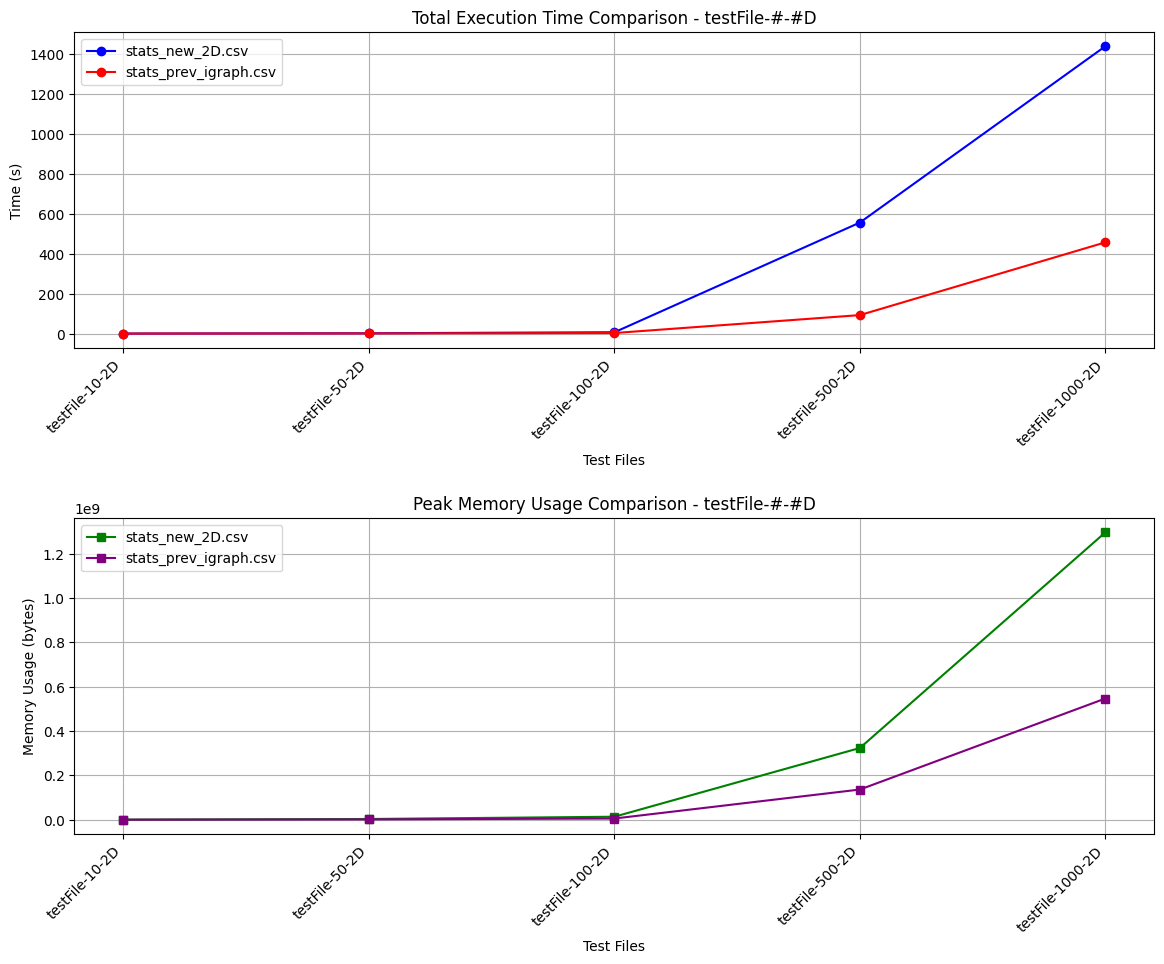

In [7]:
tst.plot_total_execution_and_memory('../performance_results/stats_new_2D.csv', '../performance_results/stats_prev_igraph.csv')